# Simple Pendulum example: forward and backward integrations

In [1]:
using OrdinaryDiffEq 
using IRKGaussLegendre
using Plots 

## ODE definition 

In [2]:
#Constants
const g = 9.81
L = 1.0

#Initial Conditions
u₀ = [0, π / 2]

#Define the problem
function simplependulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g / L) * sin(θ)
end

simplependulum (generic function with 1 method)

# Forward Integrations 

### Case 1 (adaptive)

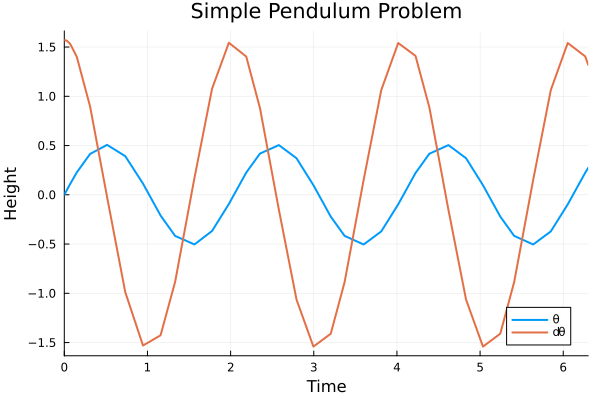

In [3]:
tspan = (0.0, 6.3)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
#sol = solve(prob, Tsit5())
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [4]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 0.0, 6.3)


36-element Vector{Float64}:
 0.0
 0.01
 0.03
 0.07
 0.15
 0.31
 0.5141810532232386
 0.7330760954247735
 0.9463065316128986
 1.1575427199667514
 1.332870609775408
 1.564884823417599
 1.7767976244744983
 ⋮
 4.223525716956362
 4.390227171866911
 4.618935373249932
 4.831187955677909
 5.034628174709277
 5.242958339823958
 5.4096296386273295
 5.638312467738845
 5.85056545675205
 6.0540058683436975
 6.264918449534742
 6.3

### Case 2 (adaptive)

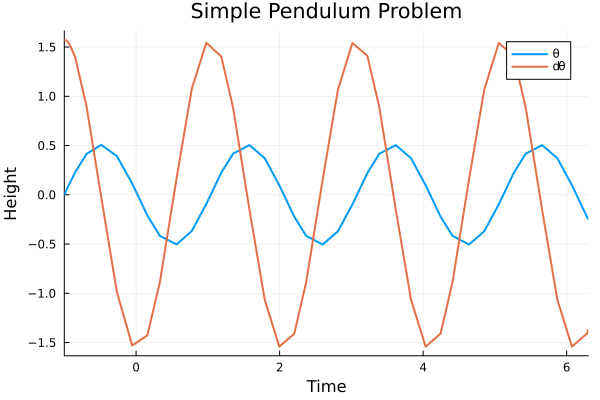

In [5]:
tspan = (-1., 6.3)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
#sol = solve(prob, Tsit5())
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [6]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, -1.0, 6.3)


41-element Vector{Float64}:
 -1.0
 -0.99
 -0.97
 -0.93
 -0.85
 -0.69
 -0.4858189467767614
 -0.2669239045752265
 -0.05369346838710145
  0.15754271996675148
  0.3328706097754079
  0.5648848234175989
  0.7767976244744982
  ⋮
  4.242958339823958
  4.4096296386273295
  4.638312467738845
  4.85056545675205
  5.0540058683436975
  5.262334709892655
  5.429008127548644
  5.657695705384836
  5.869948842693652
  6.073390203692207
  6.282394605947285
  6.3

### Case 3 (constant step size)

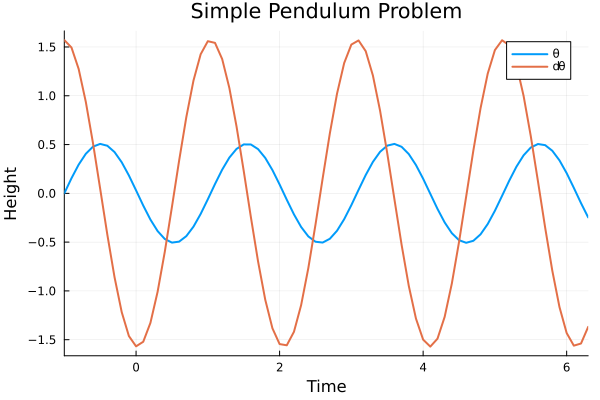

In [7]:
tspan = (-1., 6.3)

dt0=0.1

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
#sol = solve(prob, Tsit5())
sol = solve(prob, IRKGL16(), dt=dt0, adaptive=false)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [8]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, -1.0, 6.3)


74-element Vector{Float64}:
 -1.0
 -0.9
 -0.8
 -0.7
 -0.6
 -0.5
 -0.39999999999999997
 -0.29999999999999993
 -0.19999999999999996
 -0.09999999999999995
  5.551115123125783e-17
  0.10000000000000006
  0.20000000000000007
  ⋮
  5.2
  5.300000000000001
  5.4
  5.5
  5.6000000000000005
  5.7
  5.800000000000001
  5.9
  6.0
  6.1000000000000005
  6.2
  6.3

# Backward Integrations

### Case 1

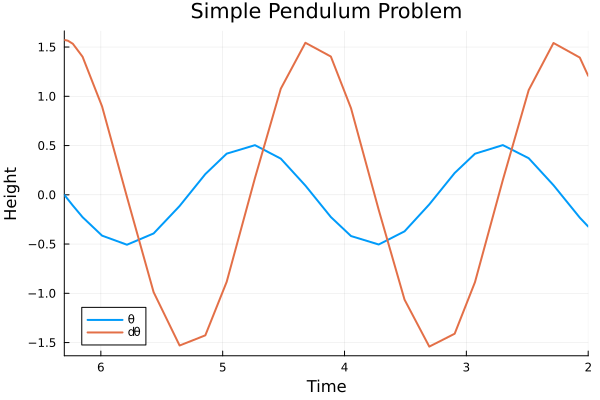

In [9]:
tspan = (6.3, 2.)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [10]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 6.3, 2.0)


26-element Vector{Float64}:
 6.3
 6.29
 6.27
 6.2299999999999995
 6.1499999999999995
 5.99
 5.785818946776761
 5.566923904575226
 5.353693468387101
 5.142457280033248
 4.967129390224592
 4.735115176582401
 4.523202375525502
 4.32109182809375
 4.112232424374271
 3.9465990774470434
 3.719623618344109
 3.5074094420281434
 3.3042521069366027
 3.095940416016385
 2.929332984104862
 2.7005495818827354
 2.4882865338032767
 2.284795736328975
 2.0688071836130906
 2.0

### Case 2

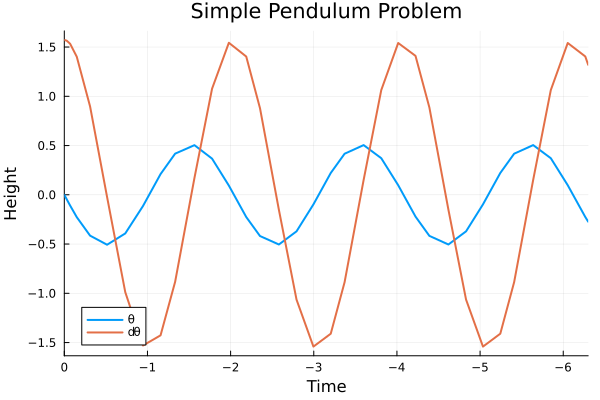

In [11]:
tspan = (0.0, -6.3)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [12]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 0.0, -6.3)


36-element Vector{Float64}:
  0.0
 -0.01
 -0.03
 -0.07
 -0.15
 -0.31
 -0.5141810532232386
 -0.7330760954247735
 -0.9463065316128986
 -1.1575427199667514
 -1.332870609775408
 -1.564884823417599
 -1.7767976244744983
  ⋮
 -4.223525716956362
 -4.390227171866911
 -4.618935373249932
 -4.831187955677909
 -5.034628174709277
 -5.242958339823958
 -5.4096296386273295
 -5.638312467738845
 -5.85056545675205
 -6.0540058683436975
 -6.264918449534742
 -6.3

### Case 3

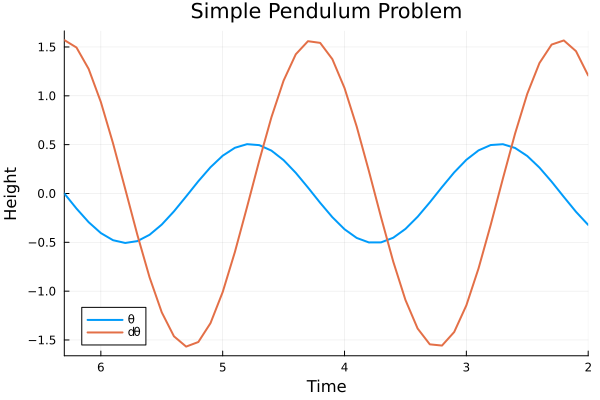

In [13]:
tspan = (6.3, 2.)

dt0=1/10
#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, IRKGL16(), dt=dt0, adaptive=false)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [14]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 6.3, 2.0)


44-element Vector{Float64}:
 6.3
 6.2
 6.1
 6.0
 5.8999999999999995
 5.8
 5.7
 5.6
 5.5
 5.3999999999999995
 5.3
 5.2
 5.1
 ⋮
 3.0999999999999996
 2.9999999999999996
 2.8999999999999995
 2.8
 2.6999999999999997
 2.5999999999999996
 2.4999999999999996
 2.3999999999999995
 2.3
 2.1999999999999997
 2.0999999999999996
 2.0